In [1]:
import os
import torch
from src import Dataset
import statistics
import random
import seaborn as sns

%load_ext autoreload
%autoreload 2

# Prepair Data

In [2]:
path = os.path.dirname(os.getcwd()) + "/Stock Datasets/Data/test"

datasets_list = []

for filename in os.listdir(path):
        if filename.endswith(".csv") and not "computed_" in filename:
            datasets_list.append(
                Dataset.StockDataset(
                    csv_file=path + "/" + filename,
                    days_of_data=14,
                    to_predict='Close',
                    label_type='real', 
                    threshold=0,
                    normalize=True,
                    training=False)
            )

print("all datasets loaded")

computing computed_Close_real_norm-True_threshold-0_AAPL.csv ...
computing finished.
all datasets loaded


In [3]:
dataset = Dataset.ConcatDataset(*datasets_list)
dataset_len = len(dataset)
print(dataset_len)

9935


In [4]:
target_list = []
for i in range(len(dataset)):
    data, target, date= dataset.__getitem__(i)
    if torch.isnan(data).any():
        print("Data:", data)
        print("At:", i)
    if torch.isnan(target).any():
        print("Target:", target)
        print("At:", i)
    target_list.append(target.item())

Target
Min: -4.361501693725586 	Max: 3.9834485054016113
Avg: 0.10751627881621738 		Std dev: 0.7544498552880288


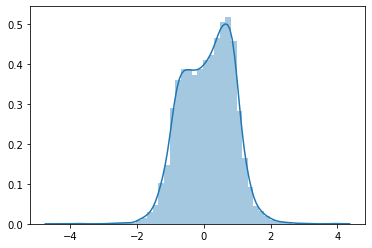

In [5]:
print("Target")
print("Min:", min(target_list), "\tMax:", max(target_list))
print("Avg:", sum(target_list) / len(target_list) ,"\t\tStd dev:", statistics.stdev(target_list))

sns.distplot(target_list)

In [8]:
index = random.randint(0, dataset_len)
data, target, date = dataset.__getitem__(index)
print("Index:", index)
print("Data:", data.shape, "\n", data)
print("Target:", target)
print(date)

Index: 9115
Data: torch.Size([14, 6]) 
 tensor([[-0.6371, -0.5105, -1.0000, -0.7257, -0.5311,  0.8807],
        [-0.6624, -0.5105, -0.8228, -0.7004, -0.2254,  0.8621],
        [-0.3207,  0.6329, -0.4430,  0.4810,  1.0000,  0.8942],
        [ 0.5696,  0.6878,  0.0464,  0.1308,  0.0331,  0.8181],
        [ 0.0549,  0.4979, -0.0253,  0.4768, -0.4505,  0.8546],
        [ 0.3038,  0.4726, -0.0211,  0.2911, -0.3896,  0.8004],
        [ 0.1730,  0.5612,  0.0591,  0.3671, -0.7975,  0.7641],
        [ 0.1266,  0.4852,  0.0717,  0.1477, -0.6780,  0.7041],
        [ 0.0380,  0.0591, -0.6751,  0.0127, -0.3512,  0.6912],
        [ 0.2532,  0.2996, -0.0042,  0.2067, -0.5922,  0.6943],
        [ 0.0844,  0.3291,  0.0717,  0.2321, -0.7998,  0.6586],
        [ 0.2743,  0.4219,  0.0802,  0.1435, -1.0000,  0.6224],
        [ 0.3207,  0.8861,  0.1603,  0.7637, -0.0161,  0.7293],
        [ 0.8734,  1.0000,  0.6793,  0.8608, -0.6283,  0.7324]])
Target: tensor([0.5654])
[9128    2017-03-16
9129    2017-03-17

In [7]:
def normalize_colmn(x):
    x_normed = x / x.max(0, keepdim=True)[0]
    return x_normed
def normalize(x):
    x_normed = (x - x.min()) / ( x.max() - x.min() )
    x_normed = 2 * x_normed - 1
    return x_normed

t = torch.tensor([[10, 10, 9], [5, 10, 0.35], [6, 9, 0.9]])
print(normalize(t))

tensor([[ 1.0000,  1.0000,  0.7927],
        [-0.0363,  1.0000, -1.0000],
        [ 0.1710,  0.7927, -0.8860]])
